# Training a machine learning model with scikit-learn
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

    jupyter notebook 04_model_training.ipynb

## Agenda

- What is the **K-nearest neighbors** classification model?
- What are the four steps for **model training and prediction** in scikit-learn?
- How can I apply this pattern to **other machine learning models**?

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Example training data

![Training data](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

*Image Credits: [Data3classes](http://commons.wikimedia.org/wiki/File:Data3classes.png#/media/File:Data3classes.png), [Map1NN](http://commons.wikimedia.org/wiki/File:Map1NN.png#/media/File:Map1NN.png), [Map5NN](http://commons.wikimedia.org/wiki/File:Map5NN.png#/media/File:Map5NN.png) by Agor153. Licensed under CC BY-SA 3.0*

## Loading the data

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [2]:
# print the shapes of X and y
print X.shape
print y.shape

(150, 4)
(150,)


## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [3]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [5]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [6]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [7]:
print(knn.predict([[3, 5, 4, 2]]))

[2]


- Returns a NumPy array
- Can predict for multiple observations at once

In [8]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)


array([2, 1])

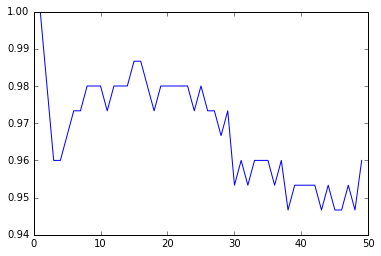

In [23]:
#A.S. If you measure the accuracy of the KNN, for N=1 the accuracy should be 1.0 since it's just mapping
#the same x-values onto the original map. But for higher values not so, since islands will disappear. 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
nn = np.arange(1,50,1)
N = len(nn)
accuracy = np.zeros(N)
for i in xrange(0,N):
    knn = KNeighborsClassifier(n_neighbors=nn[i])
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accuracy[i] = metrics.accuracy_score(y, y_pred)
%matplotlib inline
plt.plot(nn,accuracy)

## Using a different value for K

In [ ]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

## Using a different classification model

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)
    
## Credit

- Kevin Markham